This assignment will have you running two clustering algorithms and two dimensionality reduction algorithms and comparing the results. We will use synthetic data for simplicity. Follow along with the text in this notebook and add code to do that tasks when prompted. Start by importing the necessary libraries:

In [4]:
# these are the libraries you will need
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# fixes random seed to that results are reproducible
np.random.seed(1337)

First we will test the two clustering algorithms. Refer to the notes and examples. You can take code from my examples and edit as needed or write on your own. Do not copy results from other places on the internet (although you can google for ideas - please cite sources in comments if you do that).

You will be comparing k-means and dbscan. We need some data to do that. We will be using the make_blobs function from sklearn to generate clusters (http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)
This function randomly samples data from some normal distributions.

Run the following code to generate data:


In [5]:
# after running this, blobs contains the synthetic data (it is a 2-d array)
# and cluster_labels is a list that contains the ground truth cluster assignments
# for the clustering algorithm evaluation you shouldn't have to use 
# cluster_labels as we want the algorithms to discover the algorithms on their own 
centers = [[-7, -7], [-7, 9], [8, -1]]
blobs, cluster_labels = make_blobs(n_samples=1000, n_features=2, centers=centers)

In [6]:
df = pd.DataFrame(blobs, columns=['x', 'y'])

# Task #1

Run kmeans and dscan on the blobs data. For both algorithms, make a scatter plot that shows the blobs data with the colour of the scatter points corresponding to the clusters found by the algorithm. For each algorithm, record the run time of it. The title of each plot should have the following format:

[algorithm name] Time: [algorithm runtime] 

You can record the runtime by using the time.process_time() function. Make sure your notebook runtime is set to Python3 (as this function doesn't exist in Python2). Grab the runtime of an algorithm by calling time.process_time() before and after the algorithm call and computing the difference in times. Time is recorded in seconds.

You do not need to make legends or axis labels. If you want to go ahead, but we will not hold it against you if you don't (for time considerations).

Note: for the kmeans algorithm, your choice of the n_init parameter will greatly affect runtime. I use 1000 as an arbitrary value. If you have some extra time, try adjusting the value and see how low you can make it while still getting useful results.  This is very clean, low-dimensional data so having a large number here is probably not that important.

Marks (1 each):



*   Run Kmeans
*   Run dbscan
*   Record run times correctly
*   Make plots
*   have clusters in plots shown by color




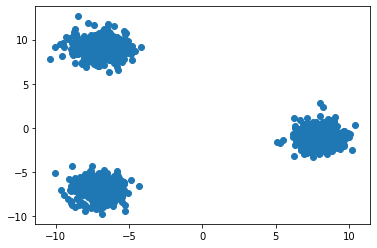

In [7]:
plt.figure()
plt.scatter(x= df['x'], y=df['y'])
plt.show()

In [8]:
## code for running clustering algorithms and making plots goes here
list_time = {}

list_time['k_means_3_1000'] = [time.process_time()]

my_kmeans_obj = KMeans(n_clusters=3, n_init=1000)
kmeans_synthetic = my_kmeans_obj.fit(df)



# time tracking at end of the process
list_time['k_means_3_1000'].append(time.process_time())
list_time['k_means_3_1000'].append(list_time['k_means_3_1000'][1]-list_time['k_means_3_1000'][0])

In [9]:
kmeans_label = kmeans_synthetic.labels_
kmeans_synthetic.cluster_centers_

df['kmeans_label'] = pd.Series(kmeans_label)

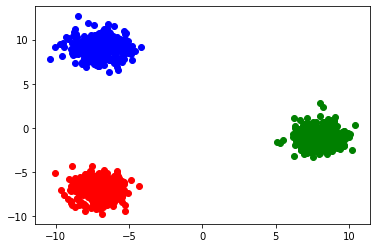

In [11]:
unique_labels_kmeans = sorted(df['kmeans_label'].unique())
colours = ['red', 'green', 'blue']

plt.figure()
for cluster_id, colour in zip(unique_labels_kmeans, colours):
    
    df_cluster = df.loc[df['kmeans_label'] == cluster_id, ["x", "y"]]
    plt.scatter(x=df_cluster['x'] ,y=df_cluster['y'], c=colour)
plt.show()

In [12]:
list_time['db_scan_3_5'] = [time.process_time()]

db_scan = DBSCAN(eps=3,
                 min_samples=5,
                 metric="euclidean",
                 metric_params=None,
                 algorithm="auto",
                 leaf_size=30,
                 p=None,
                 n_jobs=1)
db_scan = db_scan.fit(df)



# time tracking at end of the process
list_time['db_scan_3_5'].append(time.process_time())
list_time['db_scan_3_5'].append(list_time['db_scan_3_5'][1]-list_time['db_scan_3_5'][0])


df["dbscan_label"] = pd.Series(db_scan.labels_)

df.head()

,x,y,kmeans_label,dbscan_label
0,-7.356896,-6.992282,0,0
1,-7.545606,-4.278954,0,0
2,8.376102,0.019389,1,1
3,-6.368661,9.216636,2,2
4,-7.259445,9.819258,2,2


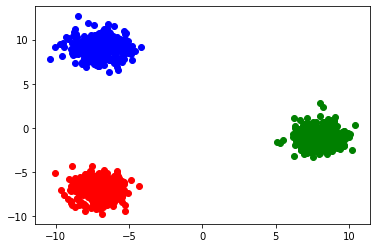

In [13]:
unique_labels_dbscan = sorted(df['dbscan_label'].unique())
colours = ['red', 'green', 'blue']

plt.figure()
for cluster_id, colour in zip(unique_labels_dbscan, colours):
    
    df_cluster = df.loc[df['dbscan_label'] == cluster_id, ["x", "y"]]
    plt.scatter(x=df_cluster['x'] ,y=df_cluster['y'], c=colour)
plt.show()

1 2.0260688129999997
2 0.020843561999999594


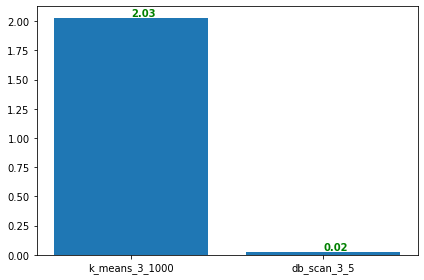

In [14]:
plt.figure()
labels = []
time_taken = []

for key,value in list_time.items():
  labels.append(key)
  time_taken.append(value[2])

plt.bar(labels,time_taken)

i = 0
for v in time_taken:
    plt.text(i , v + 0.02, f'{v:.2f}', color='green', fontweight='bold')
    i += 1
    print(i,v)

plt.tight_layout()
plt.show()


## Optional tasks

If you have time after doing Task #1, the next step is to try these clustering algorithms on some of the datasets we have used already. Here are some possible candidates, in order of how much work preparing the dataset might be:

*   Iris Dataset
*   Mushroom Dataset
*   Beer dataset
*   Agriculture dataset

For different datasets, the analysis could be different.

Iris:

* Cluster without using the species label. Then colour by species label after clustering. Can you cluster to obtain the species groups without telling your algorithm explicitly about the what the clusters should be?

Mushroom:

* Similar to Iris, except now we are dealing with categories. Remove the poison or edible label before cluster. Cluster and then colour by poison or edible.
* You need to encode the categories in a way that lends itself to clustering. Think about dummy variables or ordinal encodings depending on the column. Dummy variables for everything is an okay choice for you first analysis.
* Can you categorize your clusters in interesting ways? What mushrooms are grouped together? In terms of the other columns, what do the clusters represent?

Beer:

* Remove the style label and then cluster by the numerical attributes. Now color by style. Can you seperate them? What styles don't separate numerically and which do?

Agriculture:

* Remove region and category. Cluster. Can you separate the data in a way that gives insight into the regions?
* Can you use the centroids of each cluster to give insight into the clusters?



# Task #2

First, run the following code to generate the new data:

In [15]:
# for dimensionality reduction we want higher dimenional data
# run this code to regenerate blobs in a higher dimension
# this lime, cluster_labels is actually useful since we want to see how
# the dimensionality reduction algorithms let us visualize the original clusters
blobs, cluster_labels = make_blobs(n_samples=1000, n_features=10, centers=3)

Run pca and tsne on the higher dimension blobs data. For both algorithms, make a scatter plot that shows the blobs data with the colour of the scatter points corresponding to the original cluster labels. You can specify the pca and tsne algorithms to project the blob data onto 2 dimensions (n_components=2) and then plot the transformed data in 2 dimensions. For each algorithm, record the run time of it. The title of each plot should have the following format:

[algorithm name] Time: [algorithm runtime]

You can record the runtime by using the time.process_time() function. Make sure your notebook runtime is set to Python3 (as this function doesn't exist in Python2). Grab the runtime of an algorithm by calling time.process_time() before and after the algorithm call and computing the difference in times. Time is recorded in seconds.

You do not need to make legends or axis labels. If you want to go ahead, but we will not hold it against you if you don't (for time considerations).

If you have some extra time, try playing around with the algorithm parameters and see what happens!

Marks (1 each):


*   Run PCA
*   Run TSNE
*   Plots are made correctly

There are less marks for task 2 because we expect you to reuse plotting code from task 1. Try to think about an effective way to organize your code (Hint: functions rule!!).


In [16]:
blobs

array([[ 1.89040301, -4.62403683,  7.40289427, ...,  6.95336243,
        -5.84647298,  4.73744974],
       [-7.86898131, -2.41888415,  1.44597735, ..., -2.34293795,
         8.72931408, -6.66517644],
       [ 1.11889704, -3.39909573,  7.73954123, ...,  5.32545685,
        -5.53947449,  4.37072757],
       ...,
       [-7.23429131, -2.63358725,  1.35988883, ..., -3.17224876,
         8.59413508, -7.76046609],
       [ 3.16591651, -2.96462304,  7.19399461, ...,  5.454056  ,
        -5.50663451,  3.86878199],
       [-7.80616718, -2.12369382,  0.68370329, ..., -2.28467452,
         7.1849722 , -7.06391282]])

In [22]:
cluster_labels

array([2, 0, 2, 1, 1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 2, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 2, 0,
       1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1,
       1, 1, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0, 0, 2, 2, 1, 2,
       1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 2, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 1, 2,
       0, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 0, 0, 1,
       1, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 0,
       2, 1, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 1, 2, 1, 1, 1, 2, 0, 0, 2,

In [23]:
df = pd.DataFrame(blobs, columns = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10'])
df['cluster'] = cluster_labels

In [24]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,cluster
0,1.890403,-4.624037,7.402894,-8.467921,-8.325718,-5.227983,-0.964172,6.953362,-5.846473,4.737450,2
1,-7.868981,-2.418884,1.445977,2.323309,4.034726,-0.852318,-5.004152,-2.342938,8.729314,-6.665176,0
2,1.118897,-3.399096,7.739541,-8.369648,-6.054652,-5.211481,1.119889,5.325457,-5.539474,4.370728,2
3,-1.142783,-1.412753,7.128357,-3.254977,4.725196,-1.984725,5.038394,-5.137862,-6.750365,-8.038030,1
4,-1.999839,-1.820822,7.821915,-1.148524,6.204230,-1.461323,6.869037,-3.432713,-8.311070,-6.731073,1
...,...,...,...,...,...,...,...,...,...,...,...
995,-2.064666,-1.869937,6.311992,-2.464635,6.665658,-0.456334,5.938422,-4.370523,-6.859710,-3.250824,1
996,2.663149,-4.623261,6.877504,-8.160422,-7.763800,-2.675216,-1.471186,6.895924,-5.668806,4.656796,2
997,-7.234291,-2.633587,1.359889,-0.404776,6.157682,-0.019321,-2.405597,-3.172249,8.594135,-7.760466,0
998,3.165917,-2.964623,7.193995,-9.726191,-6.488120,-4.423951,0.411828,5.454056,-5.506635,3.868782,2


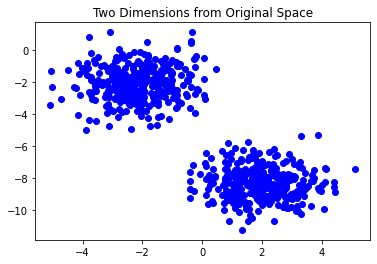

In [26]:
## code for running the dimensionality reduction algorithms goes here
# feel free to use your solution for making plots from task #1 (actually we 
# encourage it - data scientists don't like doing the same thing twice!)
# first we show two dimensions from the original space
# the clusters are not obvious are they?

plt.figure()

colours = ['blue','blue','blue']

clusters=[1, 2, 3]
for cluster_id in clusters:
    cluster_data = df.loc[df["cluster"] == cluster_id, ["X1", "X2", "X3", "X4"]]
    plt.scatter(cluster_data.X1, cluster_data.X2, c=colours[cluster_id-1])

plt.title("Two Dimensions from Original Space")
plt.show()

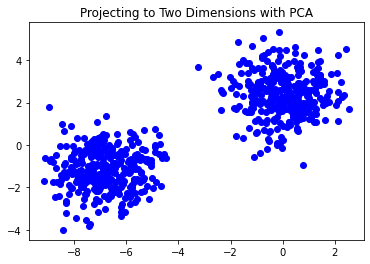

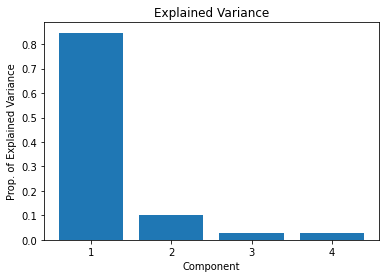

In [34]:
pca = PCA(n_components=2)
dim_data_np = pca.fit_transform(df.loc[:, ["X1", "X2", "X3", "X4"]])
dim_data_df = pd.DataFrame(dim_data_np, columns=["new_X1", "new_X2"])
dim_data_df["cluster"] = df.cluster

plt.figure()
colours = ['blue','blue','blue']
#colours=["red", "blue", "green"]
clusters=[1, 2, 3]
for cluster_id in clusters:
    cluster_data = dim_data_df.loc[dim_data_df["cluster"] == cluster_id, ["new_X1", "new_X2"]]
    plt.scatter(cluster_data.new_X1, cluster_data.new_X2, c=colours[cluster_id-1])
plt.title("Projecting to Two Dimensions with PCA")
plt.show()

list_time['PCA']=[time.process_time()]


pca = PCA(n_components=4)
pca.fit(df.loc[:, ["X1", "X2", "X3", "X4"]])

list_time['PCA'].append(time.process_time())
list_time['PCA'].append(list_time['PCA'][1]-list_time['PCA'][0])

plt.figure()
plt.bar(["1","2","3","4"], pca.explained_variance_ratio_)
plt.xlabel("Component")
plt.ylabel("Prop. of Explained Variance")
plt.title("Explained Variance")
plt.show()


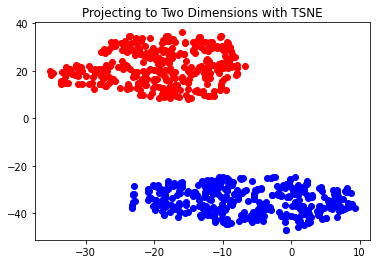

In [33]:
# working with t-SNE is the same
# notice anything different about the clustering? What about the run time?
# If you have some extra time, try modifying the default parameters and see how
# they affect the shape of the projected data

list_time['TSNE']=[time.process_time()]
tsne = TSNE(n_components=2)
dim_data_np = tsne.fit_transform(df.loc[:, ["X1", "X2", "X3", "X4"]])
dim_data_df = pd.DataFrame(dim_data_np, columns=["new_X1", "new_X2"])
dim_data_df["cluster"] = df.cluster


list_time['TSNE'].append(time.process_time())
list_time['TSNE'].append(list_time['TSNE'][1]-list_time['TSNE'][0])

plt.figure()
colours=["red", "blue", "green"]
clusters=[1, 2, 3]
for cluster_id in clusters:
    cluster_data = dim_data_df.loc[dim_data_df["cluster"] == cluster_id, ["new_X1", "new_X2"]]
    plt.scatter(cluster_data.new_X1, cluster_data.new_X2, c=colours[cluster_id-1])
plt.title("Projecting to Two Dimensions with TSNE")
plt.show()


1 2.0260688129999997
2 0.020843561999999594
3 11.912088746000002
4 0.0055329639999968094


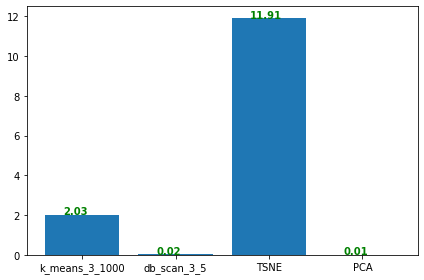

In [37]:
plt.figure()
labels = []
time_taken = []

for key,value in list_time.items():
  labels.append(key)
  time_taken.append(value[2])

plt.bar(labels,time_taken)

i = 0
for v in time_taken:
    plt.text(i-0.2, v + 0.02, f'{v:.2f}', color='green', fontweight='bold')
    i += 1
    print(i,v)

plt.tight_layout()
plt.show()
